In [62]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# !gdown 1RPoMGF2BbC-ZQMmUcb2GKUGegGKd5lci -O /iter1/
# !gdown 1MjpD1aoNz-OByq6smcoWeEGhGtOZc8mO -O /iter1/

!gdown 1-29CzlvylapD87nqOJKHQHj-qFTejWfc -O /iter2/
!gdown 1-53EzR6ylKtHbfAZfgESbPbwiuWik1_j -O /iter2/
!gdown 1-5Z86wBfQA8M0ICy3kxDjDPLL_BFHIyR -O /iter2/
!gdown 1-5aQvbP2SWnQ8w5e-MT8as60Ve7XguYp -O /iter2/
!gdown 1-7V9YhMF72hpRxuuQ4Xa4dMqlJmjSPqW -O /iter2/
!gdown 1-8JG_uHQxkFubNSzEQq1afaqiVxcN668 -O /iter2/
!gdown 1-8dd68BY8nH20atHJLTmP8MoiIvlE5aC -O /iter2/
!gdown 1-915c0kz8MPfK-mnhMK4uAE9qVLpGLJY -O /iter2/
!gdown 1efDNkTEOc7F48A0KBfwrZo-qk1rfaRZl -O /iter2/
!gdown 1nyVS0sLy_2tZSJo4L3YQLDF7GATJJyH- -O /iter2/
# !gdown 1ogaKzZOKve4xO4soXc14D6MqznMKQ5X5 -O /iter2/

# !gdown 1-0FnloAwqLZhmeX5f47obSyBVuX1VDC5 -O /iter3/
# !gdown 1-0axlRBy6wjGcPqNY__EE1XVkyyELPmb -O /iter3/
# !gdown 1-EWEXLylLRNr5nRHoIeQi1MY1P5Ju1Hb -O /iter3/
# !gdown 1-JtNgLbBmh1k95AxQN3v5NIekAAcDZbG -O /iter3/
# !gdown 1jq3oo1NK6UHrfQ5jMJaN5oeonHwQbuU8 -O /iter3/

Downloading...
From: https://drive.google.com/uc?id=1-29CzlvylapD87nqOJKHQHj-qFTejWfc
To: /iter2/meta-llama-Llama-3.1-8B outputData.csv
100% 174k/174k [00:00<00:00, 70.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-53EzR6ylKtHbfAZfgESbPbwiuWik1_j
To: /iter2/meta-llama-Llama-3.2-3B-Instruct outputData.csv
100% 174k/174k [00:00<00:00, 83.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-5Z86wBfQA8M0ICy3kxDjDPLL_BFHIyR
To: /iter2/mistralai-Mistral-7B-v0.1 outputData.csv
100% 173k/173k [00:00<00:00, 85.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-5aQvbP2SWnQ8w5e-MT8as60Ve7XguYp
To: /iter2/meta-llama-Llama-3.1-8B-Instruct outputData.csv
100% 174k/174k [00:00<00:00, 6.15MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-7V9YhMF72hpRxuuQ4Xa4dMqlJmjSPqW
To: /iter2/mistralai-Mistral-7B-v0.3 outputData.csv
100% 173k/173k [00:00<00:00, 92.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-8JG_uHQxkFubNSzEQq1afaqiVxcN668
To: /iter2/mistra

In [110]:
# open all csv files in folder
import glob, os

def get_df(loc = "/iter3/"):
  dfs = []
  names = []

  os.chdir(loc)
  for file in glob.glob("*.csv"):
      df = pd.read_csv(file)
      df['model'] = file.split(' ')[0]
      df['params'] = int(file.split('B')[0].split('-')[-1])
      dfs.append(df)

  return pd.concat(dfs, ignore_index=True)

# df = get_df()
df = get_df("/iter2/")

In [111]:
def minmaxNorm(df):
  return (df-df.min())/(df.max()-df.min())

def stdNorm(df):
  return (df-df.mean())/df.std()

# correcting spurrious data entry error
df['answer ratios'] = df['answer ratios'].str.replace('/', '-')
df['answer ratios'] = df['answer ratios'].str.replace('/', '-')
df['answer ratios'] = df['answer ratios'].str.replace('6-25-1969', '6-25-69')
df['answer ratios'] = df['answer ratios'].str.replace('3-11-1986', '3-11-86')

df['human response percentages'] = df['answer ratios'].apply(lambda x: np.array([float(item) for item in x.split('-')])/100)

df = df.rename(columns={'Answers': 'answers'})

df['self-report best'] = df['self-report certainties'].apply(lambda x: [float(item[0]) for item in ast.literal_eval(x)])
df['self-report worst'] = df['self-report certainties'].apply(lambda x: [float(item[1]) for item in ast.literal_eval(x)])


df['pop_std certainties'] = df['pop_std certainties'].apply(lambda x: np.array(ast.literal_eval(x)))
df['pop_sr certainties'] = df['pop_sr certainties'].apply(lambda x: np.array(ast.literal_eval(x)))

df['freq certainties'] = df['freq certainties'].apply(lambda x: np.array(ast.literal_eval(x)))


df['human c-ent'] = df['human response percentages'].apply(lambda x: (np.log(x)*x).sum())

df.drop(1, inplace=True) # error in transcription makes this necessary


df['human c-ent'] = stdNorm(df['human c-ent'])
df['top-p certainties'] = stdNorm(df['top-p certainties'])
df['top-k-ent certainties'] = stdNorm(df['top-k-ent certainties'])
df['entropy certainties'] = stdNorm(df['entropy certainties'])
df['c-ent certainties'] = stdNorm(df['c-ent certainties'])

df['pop_std certainties'] = df['pop_std certainties'].apply(lambda x: stdNorm(np.array(x)))
df['freq certainties'] = df['freq certainties'].apply(lambda x: stdNorm(np.array(x)))
df['self-report best'] = df['self-report best'].apply(lambda x: stdNorm(np.array(x)))
df['self-report worst'] = df['self-report worst'].apply(lambda x: stdNorm(np.array(x)))

In [112]:
def get_correlation_ent(df, measure = 'c-ent certainties', human = 'human c-ent'):
  temp = df.groupby('model')[[human, measure]].corr().reset_index()
  temp = temp.loc[temp['level_1'] == human]

  # print(temp.iloc[:,-1].mean())
  temp.drop(columns=['level_1', human], inplace=True)
  temp = temp.merge(df.groupby('model').first()['params'], on='model', how='inner').sort_values(measure, ascending=True)
  # plt.scatter(temp['params'], temp[measure])

  return temp

def get_correlation_series(df, measure = 'pop_std certainties', human = 'human response percentages'):
  temp = df.copy()
  temp[measure] = temp[[human, measure]].apply(lambda x: np.corrcoef(x[human],x[measure])[0,1], axis=1)
  temp = temp[['model', measure]].groupby('model').mean().sort_values(measure).reset_index()
  temp = temp.merge(df.groupby('model').first()['params'], on='model', how='inner')
  # plt.scatter(temp['params'], temp[measure])
  return temp

def fit_line(x, y):
    m = np.cov(x,y)[0,1]/np.std(x)**2
    b = np.mean(y) - m*np.mean(x)

    print(f"Optimal slope (m): {m}")
    print(f"Optimal intercept (b): {b}")

    return m, b

def linear_fit_conf(x, y, m):
    standard_error = np.sqrt((y.std()**2)/np.sum((x - x.mean())**2))
    interval = (m - 2*standard_error, m + 2*standard_error)
    print(f"95% confidence interval for slope: {interval}")
    print(f"learned m is standard deviations from zero: {m/standard_error}")
    return interval

def r_2_metric(x, y, m, b):
  return np.corrcoef(m*x+b,y)[0,1]**2

def MSE(x,y,m,b):
  return np.mean((y-(m*x+b))**2)

## How well do the entropy based measures align with human uncertainty?

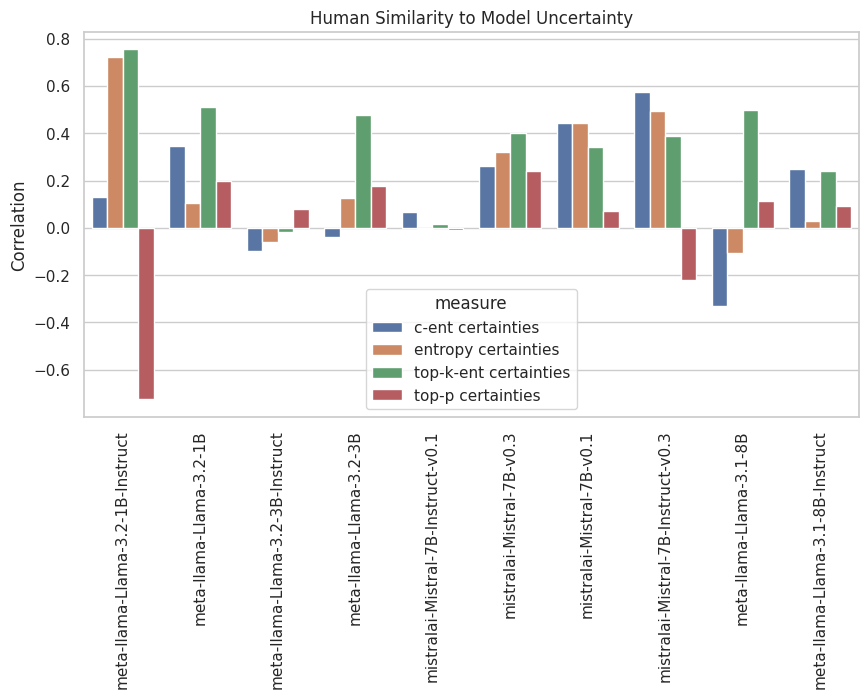

In [113]:
measures = ['c-ent certainties', 'entropy certainties', 'top-k-ent certainties', 'top-p certainties']
new = []
for measure in measures:
  temp = get_correlation_ent(df, measure = measure)
  new.append(temp)

temp = new[0]
for i in range(1, len(new)):
  temp = temp.merge(new[i], how='inner')

melted = temp.melt(id_vars=['model', 'params'], var_name='measure', value_name='correlation')
melted = melted.sort_values(['params', 'measure'], ascending=True)

sns.barplot(x='model', y='correlation', hue='measure', data=melted)
# label plot as human similarity to model uncertainty correlated with model size
plt.title('Human Similarity to Model Uncertainty')
plt.xlabel('')
plt.ylabel('Correlation')
#rotate x labels
plt.xticks(rotation=90)
# figure size 10 5 seaborn
plt.gcf().set_size_inches(10,5)
plt.show()

melted_ent = melted

temp_ent = melted.groupby('measure')[['correlation', 'params']].apply(lambda x: x.corr().iloc[0,1]).reset_index()

## How well do series value based uncertainty measures align with human uncertainty?

Some of these correlate well. Keep in mind, that each row is a series for the humans and the model. High correlation for a model and measure pair suggests that the series across model and human tended to correlate within each series. However, this sort of method may not be interpretable. The model's values for a different question, while consistent within that question, may not have any relationship to another question's uncertainty series.

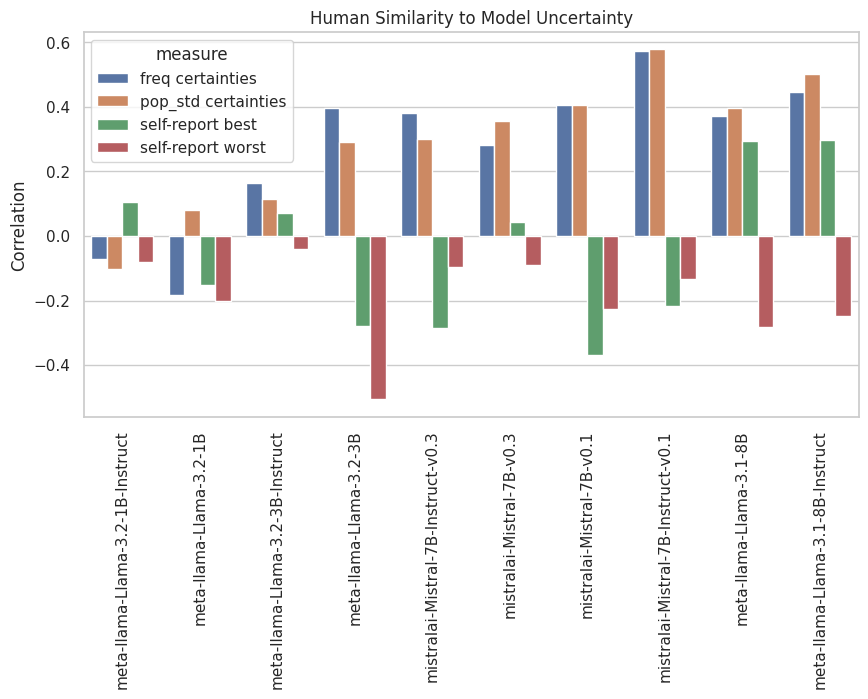

In [114]:
measures = ['pop_std certainties', 'freq certainties', 'self-report best', 'self-report worst']
new = []
for measure in measures:
  temp = get_correlation_series(df, measure = measure)
  new.append(temp)

temp = new[0]
for i in range(1, len(new)):
  temp = temp.merge(new[i], how='inner')

melted = temp.melt(id_vars=['model', 'params'], var_name='measure', value_name='correlation')
melted = melted.sort_values(['params', 'measure'], ascending=True)

sns.barplot(x='model', y='correlation', hue='measure', data=melted)
# label plot as human similarity to model uncertainty correlated with model size
plt.title('Human Similarity to Model Uncertainty')
plt.xlabel('')
plt.ylabel('Correlation')
#rotate x labels
plt.xticks(rotation=90)
# figure size 10 5 seaborn
plt.gcf().set_size_inches(10,5)
plt.show()

# sns.barplot(x='measure', y='correlation', hue='model', data=melted)
# # label plot as human similarity to model uncertainty correlated with model size
# plt.title('Human Similarity to Model Uncertainty')
# plt.xlabel('')
# plt.ylabel('Correlation')
# #rotate x labels
# plt.xticks(rotation=90)
# # figure size 10 5 seaborn
# plt.gcf().set_size_inches(10,5)

# # move legend out of plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

temp_series = melted.groupby('measure')[['correlation', 'params']].apply(lambda x: x.corr().iloc[0,1]).reset_index()
melted_series = melted

# Same question but looking across both series and entropy methods

It is clear that some methods do correlate with their human population counterpart. That's good as it suggests alignment.

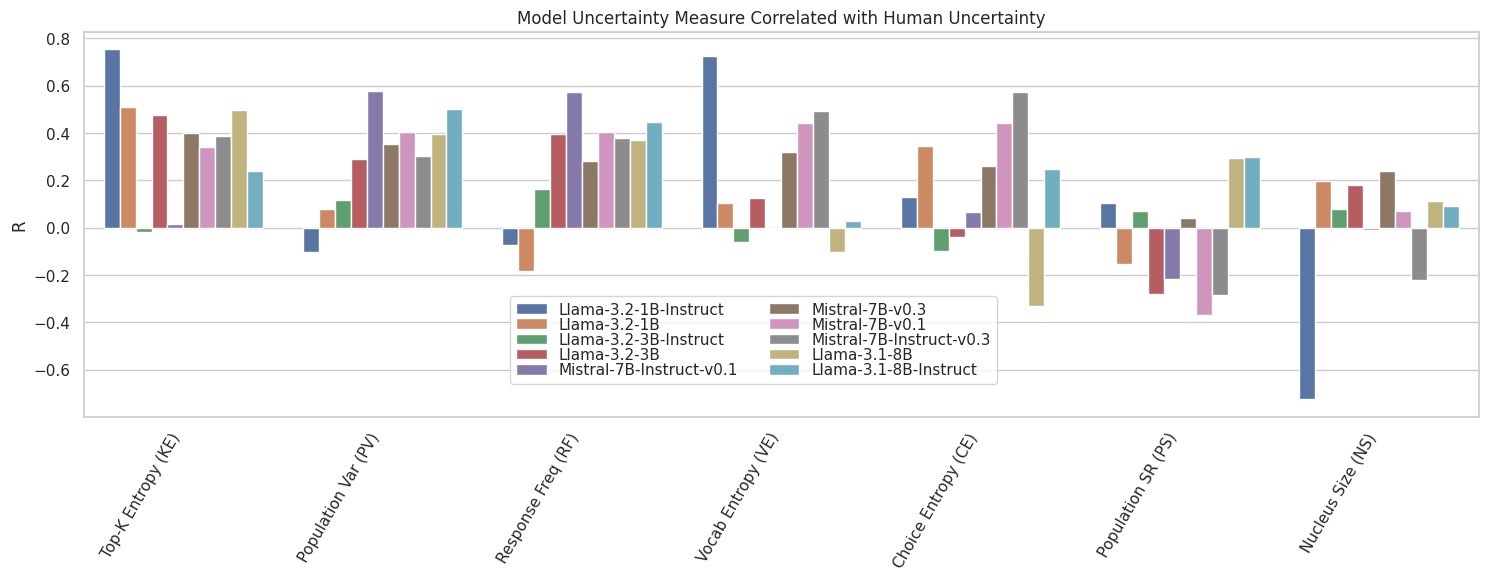

In [155]:
def map_measure(string):
  map = {
  "self report": "Self-Report (SR)",
  "freq certainties" : "Response Freq (RF)",
  "top-p certainties" : "Nucleus Size (NS)",
  "entropy certainties" : "Vocab Entropy (VE)",
  "c-ent certainties" : "Choice Entropy (CE)",
  "top-k-ent certainties" : "Top-K Entropy (KE)",
  "pop_std certainties" : "Population Var (PV)",
  "self-report best" : "Population SR (PS)",
  "All Combined" : "NS + CE + VE + KE",
  'NS and CE combined': "NS + KE"}

  if string in map:
    return map[string]
  else:
    return string

def map_model(string):
  consume = ['meta-llama-', 'mistralai-']
  for c in consume:
    string = string.replace(c, '')
  return string

melted = pd.concat([melted_ent, melted_series], axis=0)
melted['sort mean'] = melted.groupby('measure')['correlation'].transform(lambda x: np.abs(x.mean()))
melted = melted.sort_values(['sort mean', 'measure'], ascending=False)

new = melted.copy()
new = new[new['measure'] != 'self-report worst']
new['measure'] = new['measure'].apply(lambda x: map_measure(x))
new['model'] = new['model'].apply(lambda x: map_model(x))


sns.barplot(x='measure', y='correlation', hue='model', data=new)
# label plot as human similarity to model uncertainty correlated with model size
plt.title('Model Uncertainty Measure Correlated with Human Uncertainty')
plt.xlabel('')
plt.ylabel('R')
#rotate x labels
plt.xticks(rotation=60)
# right hand align x ticks
plt.xticks(ha='right')
# figure size 10 5 seaborn
plt.gcf().set_size_inches(18,5)

# scale legend
plt.legend(loc='center left', bbox_to_anchor=(0.3, 0.2), ncol=2, labelspacing=0.01)
# make legend two columns of entries

plt.show()

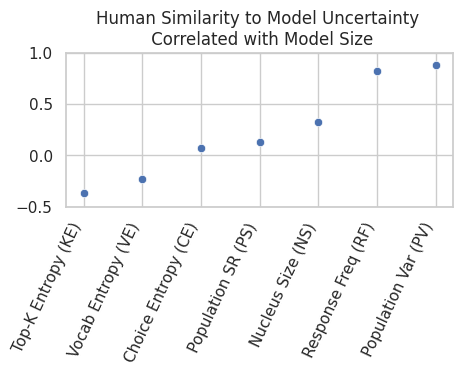

In [156]:


combo = pd.concat([temp_ent, temp_series], axis=0)
combo = combo.rename(columns={0:'correlation'}).sort_values('correlation', ascending=True)
# combo.plot.scatter(x='measure', y='correlation', rot=60, figsize=(10,5))

# generate plot and figure with size
fig, ax = plt.subplots(figsize=(5,2))

new = combo.copy()
new = new[new['measure'] != 'self-report worst']
new['measure'] = new['measure'].apply(lambda x: map_measure(x))
sns.scatterplot(x='measure', y='correlation', data=new, ax=ax)

# rotate x label
plt.xticks(rotation=65)
# left justify x ticks
plt.xticks(ha='right')
# remove x label
ax.set(xlabel=None)
ax.set(ylabel=None)

# set y limits
ax.set_ylim(-0.5,1)

# label plot as human similarity to model uncertainty correlated with model size
plt.title('Human Similarity to Model Uncertainty \n Correlated with Model Size')
# plt.ylabel('R')
plt.show()

### Can we predict the human uncertainty from the model's uncertainty


In [117]:
measures = ['c-ent certainties', 'entropy certainties', 'top-k-ent certainties', 'top-p certainties']

def fit_line_ent(df, df_test = None, measure = 'c-ent certainties', human = 'human c-ent', plot = False):
  if df_test is None:
    df_test = df.copy()

  m, b = fit_line(df[measure], df[human])
  interval = linear_fit_conf(df[measure], df[human], m)
  r_2 = r_2_metric(df_test[measure], df_test[human], m, b)
  mse = ((df_test[human] - (df_test[measure]*m+b))**2).mean()

  if plot:
    print(f'r^2 metric: {r_2}')

    #plot line and scatter with seaborn
    sns.regplot(x=measure, y=human, data=df, scatter_kws={"s": 10}, line_kws={"color": "red"})
    plt.title('Regression of Model to Human Uncertainty ' + df['model'].iloc[0])
    plt.xlabel(measure)
    plt.ylabel(human)
    plt.gcf().set_size_inches(10,5)
    plt.show()

  return m, b, interval, r_2, mse


def fit_line_ent_all(df, df_test= None, human = 'human c-ent', measures = ['c-ent certainties', 'entropy certainties', 'top-k-ent certainties', 'top-p certainties'], plot = False):
  rs = []
  mses = []
  for measure in measures:

    x = np.linspace(df[measure].min(), df[measure].max(), 100)
    m, b, intr, r, mse = fit_line_ent(df, df_test=df_test, measure = measure, human = human, plot=plot)
    # plt.plot(x, m*x+b, label=f'{measure} r^2: {r}')
    rs.append(r)
    mses.append(mse)

    # plt.scatter(df[measure], df[human], s=10)

  # plt.legend()
  # plt.title('Regression of Model to Human Uncertainty ' + df['model'].iloc[0])
  # plt.xlabel('Model Uncertainty')
  # plt.ylabel('Human Uncertainty')
  # plt.gcf().set_size_inches(10,5)
  # plt.show()
  return rs, mses, measures

temp1 = df.groupby('model').apply(lambda x: fit_line_ent_all(x))



Optimal slope (m): -6142.629098962434
Optimal intercept (b): 4287.3387965327465
95% confidence interval for slope: (-12073.876578173182, -211.38161975168714)
learned m is standard deviations from zero: -2.071277288797201
Optimal slope (m): -0.13105113349678965
Optimal intercept (b): -0.07764102370305044
95% confidence interval for slope: (-0.5335760309037241, 0.2714737639101447)
learned m is standard deviations from zero: -0.6511454786574502
Optimal slope (m): 1.2979499030922135
Optimal intercept (b): 0.7571740122411219
95% confidence interval for slope: (0.46536582911320923, 2.1305339770712175)
learned m is standard deviations from zero: 3.1178830911073723
Optimal slope (m): 0.094797398317905
Optimal intercept (b): -0.026870870758554405
95% confidence interval for slope: (-0.17117831542078393, 0.36077311205659396)
learned m is standard deviations from zero: 0.7128274757524655
Optimal slope (m): 34215.737230859035
Optimal intercept (b): -23882.890505114505
95% confidence interval for s

<ipython-input-117-5e924036a60e>:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp1 = df.groupby('model').apply(lambda x: fit_line_ent_all(x))


In [118]:
measures = ['pop_std certainties', 'freq certainties', 'self-report best', 'self-report worst']

def fit_line_series(df, measure = 'pop_std certainties', human = 'human response percentages', plot = False):
  vars = zip(df[measure].to_list(), df[human].to_list())
  lines = [fit_line(x,y) for x,y in vars]
  intervals = [linear_fit_conf(x, y, line[0]) for x,y,line in zip(vars, lines)]

  m = np.mean([line[0] for line in lines])
  b = np.mean([line[1] for line in lines])
  interval = (np.mean([interval[0] for interval in intervals]), np.mean([interval[1] for interval in intervals]))

  temp = df[[human, measure]].explode([human, measure]).reset_index().astype(float)
  r_2 = r_2_metric(temp[measure], temp[human], m, b)
  mse = MSE(temp[measure], temp[human], m, b)

  if plot:
    print(f'r^2 metric: {r_2}')

    #plot line and scatter with seaborn
    sns.regplot(x=measure, y=human, data=df, scatter_kws={"s": 10}, line_kws={"color": "red"})
    plt.title('Regression of Model to Human Uncertainty' + df['model'].iloc[0])
    plt.xlabel(measure)
    plt.ylabel(human)
    plt.gcf().set_size_inches(10,5)
    plt.show()

  return m, b, interval, r_2, mse



def fit_line_series_all(df, human = 'human response percentages', measures = ['pop_std certainties', 'freq certainties', 'self-report best', 'self-report worst']):
  rs = []
  mses = []
  for measure in measures:
    # temp = df[[human, measure]].explode([human, measure]).astype(float)
    temp = df
    # x = np.linspace(temp[measure].min(), temp[measure].max(), 100)
    m, b, intr, r, mse = fit_line_series(temp, measure = measure, human = human)
    # plt.plot(x, m*x+b, label=f'{measure} r^2: {r}')
    rs.append(r)
    mses.append(mse)

  # plt.legend()
  # plt.title('Regression of Model to Human Uncertainty ' + df['model'].iloc[0])
  # plt.xlabel('Model Uncertainty')
  # plt.ylabel('Human Uncertainty')
  # plt.gcf().set_size_inches(10,5)
  # plt.show()
  return rs, mses, measures


temp2 = df.groupby('model').apply(lambda x: fit_line_series_all(x))

Optimal slope (m): 0.6300000000000001
Optimal intercept (b): 0.495
Optimal slope (m): 0.2540719428233335
Optimal intercept (b): 0.33
Optimal slope (m): 0.007846423538716046
Optimal intercept (b): 0.33
Optimal slope (m): -0.07286996618140204
Optimal intercept (b): 0.3333333333333333
Optimal slope (m): 0.76
Optimal intercept (b): 0.49000000000000016
Optimal slope (m): 0.02147313908309103
Optimal intercept (b): 0.33666666666666667
Optimal slope (m): 0.2938959462423019
Optimal intercept (b): 0.25500000000000006
Optimal slope (m): 0.24504903017292004
Optimal intercept (b): 0.25750000000000006
Optimal slope (m): -0.09020656663169885
Optimal intercept (b): 0.2475
Optimal slope (m): -0.046699822507288456
Optimal intercept (b): 0.25
Optimal slope (m): -0.04402285575791155
Optimal intercept (b): 0.3333333333333333
Optimal slope (m): 0.03566499063571368
Optimal intercept (b): 0.33
Optimal slope (m): -0.07072178928957526
Optimal intercept (b): 0.32666666666666666
Optimal slope (m): 0.8200000000000

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/di

Optimal slope (m): -0.6300000000000001
Optimal intercept (b): 0.49500000000000016
Optimal slope (m): -0.2784630635314092
Optimal intercept (b): 0.33
Optimal slope (m): 0.060555715765551
Optimal intercept (b): 0.33
Optimal slope (m): -0.07532876541790642
Optimal intercept (b): 0.3333333333333333
Optimal slope (m): -0.76
Optimal intercept (b): 0.4899999999999999
Optimal slope (m): -0.1927446395926682
Optimal intercept (b): 0.33666666666666656
Optimal slope (m): 0.2963907947020985
Optimal intercept (b): 0.25499999999999995
Optimal slope (m): -0.015309999189574475
Optimal intercept (b): 0.2575
Optimal slope (m): 0.08002100095565282
Optimal intercept (b): 0.2475
Optimal slope (m): -0.006478053551687219
Optimal intercept (b): 0.25
Optimal slope (m): 0.3700434346732623
Optimal intercept (b): 0.33333333333333337
Optimal slope (m): 0.08119125621892942
Optimal intercept (b): 0.33
Optimal slope (m): -0.24466042071934938
Optimal intercept (b): 0.3266666666666667
Optimal slope (m): -0.8200000000000

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Optimal slope (m): 0.6000000000000001
Optimal intercept (b): 0.49999999999999994
Optimal slope (m): -0.24
Optimal intercept (b): 0.49999999999999933
Optimal slope (m): 0.35000000000000003
Optimal intercept (b): 0.49499999999999994
Optimal slope (m): 0.6300000000000001
Optimal intercept (b): 0.49499999999999994
Optimal slope (m): 0.2221563337084741
Optimal intercept (b): 0.33
Optimal slope (m): -0.15951886971806525
Optimal intercept (b): 0.33
Optimal slope (m): 0.10972477746788672
Optimal intercept (b): 0.33333333333333337
Optimal slope (m): 0.76
Optimal intercept (b): 0.49
Optimal slope (m): -0.2413072006614994
Optimal intercept (b): 0.3366666666666666
Optimal slope (m): 0.24806431105316934
Optimal intercept (b): 0.255
Optimal slope (m): 0.24108042000254185
Optimal intercept (b): 0.2575
Optimal slope (m): -0.08089676753871748
Optimal intercept (b): 0.2475
Optimal slope (m): -0.0469755786304639
Optimal intercept (b): 0.25
Optimal slope (m): -0.27024236698447995
Optimal intercept (b): 0.

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/di

Optimal slope (m): -0.060817850375994256
Optimal intercept (b): 0.2475
Optimal slope (m): -0.05699161388936248
Optimal intercept (b): 0.25
Optimal slope (m): 0.36241807056084424
Optimal intercept (b): 0.3333333333333336
Optimal slope (m): -0.08042010462453479
Optimal intercept (b): 0.33
Optimal slope (m): -0.166482154897441
Optimal intercept (b): 0.32666666666666666
Optimal slope (m): 0.8200000000000001
Optimal intercept (b): 0.5000000000000001
Optimal slope (m): 0.6100000000000001
Optimal intercept (b): 0.505
Optimal slope (m): 0.14999999999999997
Optimal intercept (b): 0.505
Optimal slope (m): -0.14999999999999997
Optimal intercept (b): 0.495
Optimal slope (m): 0.21999999999999997
Optimal intercept (b): 0.45999999999999996
Optimal slope (m): -0.48
Optimal intercept (b): 0.47
Optimal slope (m): -0.54
Optimal intercept (b): 0.49000000000000005
Optimal slope (m): -0.0662204488271368
Optimal intercept (b): 0.3333333333333333
Optimal slope (m): -0.2539231092074801
Optimal intercept (b): 0

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Optimal slope (m): 0.16139721807814406
Optimal intercept (b): 0.3333333333333333
Optimal slope (m): 0.395594639229044
Optimal intercept (b): 0.3333333333333333
Optimal slope (m): 0.5603810152593347
Optimal intercept (b): 0.33333333333333315
Optimal slope (m): -0.09480349018775709
Optimal intercept (b): 0.3333333333333333
Optimal slope (m): 0.033301393483861935
Optimal intercept (b): 0.2475
Optimal slope (m): 0.09682511983103201
Optimal intercept (b): 0.2475
Optimal slope (m): 0.006303733914199548
Optimal intercept (b): 0.24750000000000003
Optimal slope (m): -0.024449143721672253
Optimal intercept (b): 0.25
Optimal slope (m): -0.21999999999999997
Optimal intercept (b): 0.5
Optimal slope (m): -0.42
Optimal intercept (b): 0.5
Optimal slope (m): -0.6200000000000001
Optimal intercept (b): 0.4999999999999999
Optimal slope (m): 0.52
Optimal intercept (b): 0.5000000000000003
Optimal slope (m): 0.42
Optimal intercept (b): 0.5000000000000001
Optimal slope (m): -0.6200000000000001
Optimal interce

<ipython-input-118-e7139ebc6d37>:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp2 = df.groupby('model').apply(lambda x: fit_line_series_all(x))


In [119]:
def combine_measures_r2(df, full_df):

  df = df.reset_index()
  df['r2'] = df.apply(lambda x: x[0][0], axis = 1)
  df['mse'] = df.apply(lambda x: x[0][1], axis = 1)
  df['measure'] = df.apply(lambda x: x[0][2], axis = 1)
  df = df.explode(['r2', 'mse', 'measure']).reset_index()
  df = df.merge(full_df.groupby('model').first()['params'], on='model', how='inner')
  df.drop(columns=[0], inplace=True)
  return df

result_full_train = combine_measures_r2(temp1, df)
# result = pd.concat([result, combine_measures_r2(temp2, df)], axis=0)

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# fit a multiple linear regression to the features
def fit_mult_reg(features, output):
  model = LinearRegression()
  model.fit(features, output)
  return model

def predict_mult_reg(model, features):
  return model.predict(features)

In [121]:
measures = ['c-ent certainties', 'entropy certainties', 'top-k-ent certainties', 'top-p certainties']
measures2 = ['c-ent certainties', 'top-p certainties']

def fit_mult_ent(df, df_test=None, measures = measures, human = 'human c-ent', plot = False):
  if df_test is None:
    df_test = df.copy()

  # print(measures)

  model = fit_mult_reg(df[measures], df[human])
  r_2 = np.corrcoef(predict_mult_reg(model, df_test[measures]), df_test[human])[0,1]**2
  mse = ((predict_mult_reg(model, df_test[measures]) - df_test[human])**2).mean()

  return r_2, mse, ['combined'], model



temp = df.groupby('model').apply(lambda x: fit_mult_ent(x, measures=measures))
fit = temp
temp = combine_measures_r2(temp, df)
temp['measure'] = 'All Combined'

result_full_train = pd.concat([result_full_train, temp], axis=0)

# again for measures 2

temp = df.groupby('model').apply(lambda x: fit_mult_ent(x, measures=measures2))
temp = combine_measures_r2(temp, df)
temp['measure'] = 'NS and CE combined'

result_full_train = pd.concat([result_full_train, temp], axis=0)

<ipython-input-121-12617d2d08fa>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp = df.groupby('model').apply(lambda x: fit_mult_ent(x, measures=measures))
<ipython-input-121-12617d2d08fa>:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp = df.groupby('model').apply(lambda x: fit_mult_ent(x, measures=measures2))


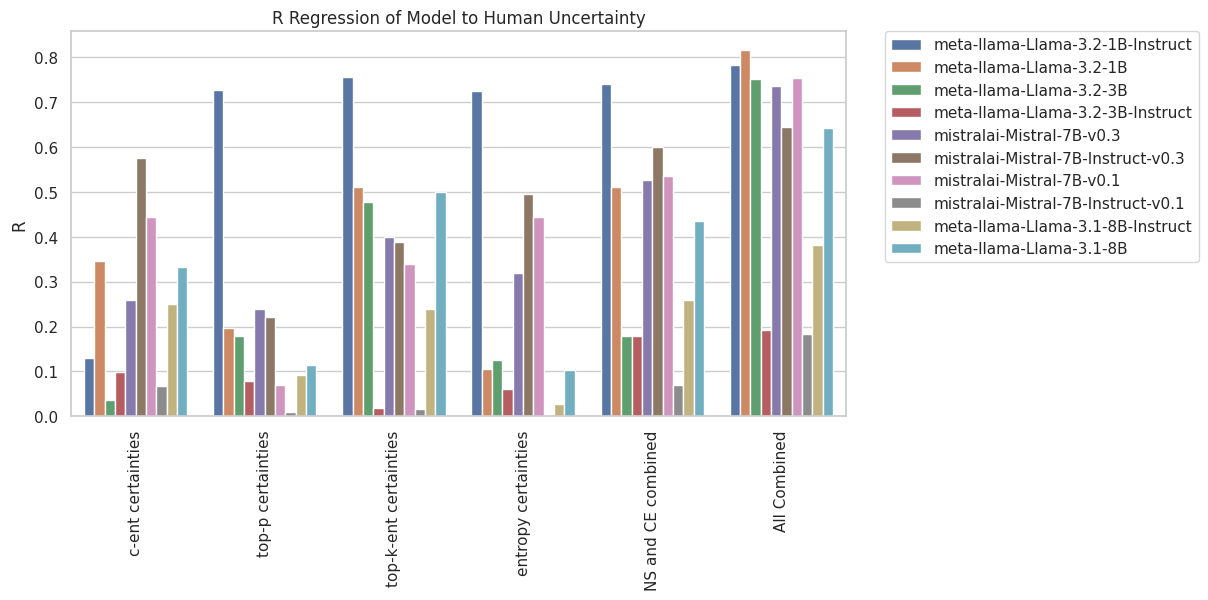

In [122]:
result_full_train['r'] = result_full_train['r2'].apply(lambda x: np.sqrt(x))
result_full_train = result_full_train.sort_values(['params'], ascending=True)
sns.barplot(x='measure', y='r', hue='model', data=result_full_train)
plt.title('R Regression of Model to Human Uncertainty')
plt.xlabel('')
plt.ylabel('R')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)

# move legend out of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

<ipython-input-123-359c5f298546>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp = temp.groupby('model').apply(lambda x: x['learned'].apply(lambda x: stdNorm(np.abs(x.coef_)))).reset_index()


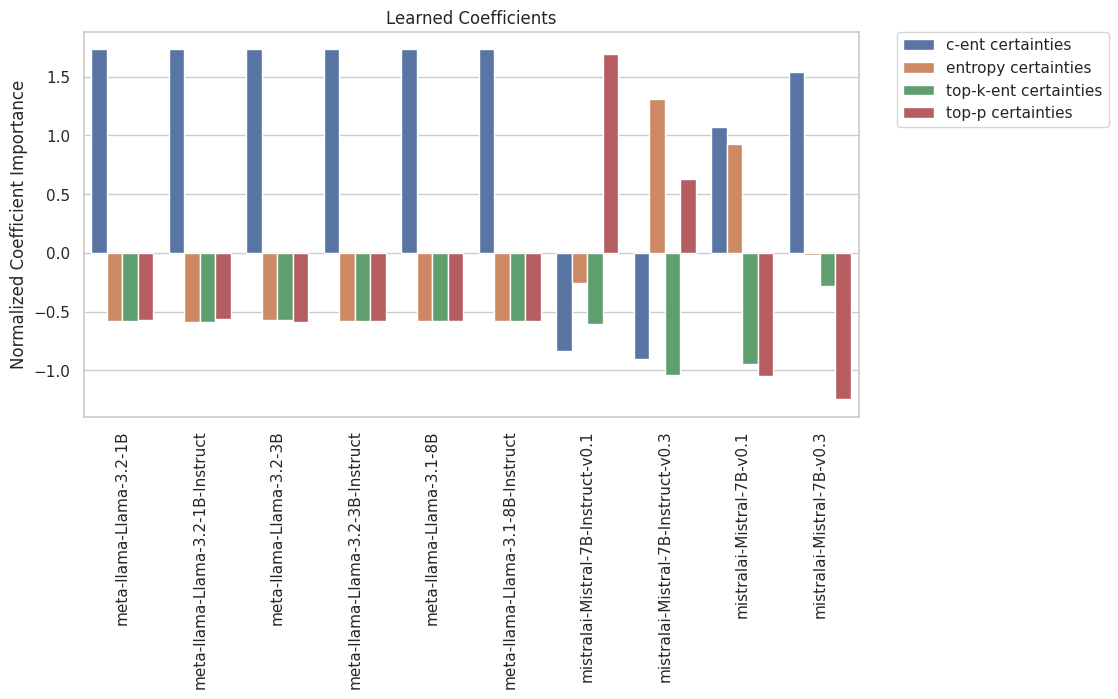

In [123]:
temp = fit.copy()
temp = temp.reset_index()
temp['learned'] = temp.apply(lambda x: x[0][3], axis = 1)
measures = ['c-ent certainties', 'entropy certainties', 'top-k-ent certainties', 'top-p certainties']

temp = temp.groupby('model').apply(lambda x: x['learned'].apply(lambda x: stdNorm(np.abs(x.coef_)))).reset_index()
temp['measures'] = temp['learned'].apply(lambda x: measures)
temp = temp.explode(['learned', 'measures'])
temp = temp.merge(df.groupby('model').first()['params'], on='model', how='inner')
temp['vendor'] = temp['model'].str.split('-').str[0]
temp = temp.sort_values(['vendor', 'params'], ascending = True)

sns.barplot(x='model', y='learned', hue='measures', data=temp)
plt.title('Learned Coefficients')
plt.xlabel('')
plt.ylabel('Normalized Coefficient Importance')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,5)

# move legend off plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

## Train a model on top p and c ent

In [136]:
measures = ['c-ent certainties', 'entropy certainties', 'top-k-ent certainties', 'top-p certainties']
measures2 = ['c-ent certainties', 'top-p certainties']
measures2 = ['top-k-ent certainties', 'entropy certainties']
measures2 = ['top-k-ent certainties', 'c-ent certainties']
measures2 = ['top-k-ent certainties', 'top-p certainties']

# folds = 3
folds = 3

combined_results = []
combined2_results = []
individual_results = []

df = df.sample(frac=1, random_state=42)

questions = df['Questions'].unique().shape[0]

for num in range(folds):
  # get fold start
  start = int(num/folds*questions)
  # get fold end
  end = int((num+1)/folds*questions)
  print(start, end)

  grouped = df.groupby('Questions')
  group_dict = dict(list(grouped))
  selected_keys = list(group_dict.keys())[start:end]

  df_test = pd.concat([group_dict[key] for key in selected_keys])
  df_train = df[~df.Questions.isin(df_test.Questions)]

  combined_results.append(df_train.groupby('model').apply(lambda x: fit_mult_ent(x, df_test = df_test[df_test['model']==x['model'].iloc[0]], measures=measures)))
  combined2_results.append(df_train.groupby('model').apply(lambda x: fit_mult_ent(x, df_test = df_test[df_test['model']==x['model'].iloc[0]], measures=measures2)))
  individual_results.append(df_train.groupby('model').apply(lambda x: fit_line_ent_all(x, df_test=df_test[df_test['model']==x['model'].iloc[0]])))




0 12


<ipython-input-136-17e0d0f97fc4>:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_results.append(df_train.groupby('model').apply(lambda x: fit_mult_ent(x, df_test = df_test[df_test['model']==x['model'].iloc[0]], measures=measures)))
<ipython-input-136-17e0d0f97fc4>:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined2_results.append(df_train.groupby('model').apply(lambda x: fit_mult_ent(x, d

Optimal slope (m): -9873.201915738811
Optimal intercept (b): 6890.918097056921
95% confidence interval for slope: (-15961.9509638407, -3784.452867636922)
learned m is standard deviations from zero: -3.2430970098255862
Optimal slope (m): 0.4884296960527356
Optimal intercept (b): 0.10134392415227109
95% confidence interval for slope: (-0.08351126185479402, 1.0603706539602653)
learned m is standard deviations from zero: 1.707972437713419
Optimal slope (m): 1.230094956137269
Optimal intercept (b): 0.6199235067578464
95% confidence interval for slope: (0.38454023964184936, 2.0756496726326885)
learned m is standard deviations from zero: 2.9095573169662106
Optimal slope (m): -0.17122605683085607
Optimal intercept (b): -0.07512918548385789
95% confidence interval for slope: (-0.5305677420535209, 0.18811562839180873)
learned m is standard deviations from zero: -0.9529985741829894
Optimal slope (m): 16046.04614192804
Optimal intercept (b): -11200.377459730205
95% confidence interval for slope: (

<ipython-input-136-17e0d0f97fc4>:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  individual_results.append(df_train.groupby('model').apply(lambda x: fit_line_ent_all(x, df_test=df_test[df_test['model']==x['model'].iloc[0]])))
<ipython-input-136-17e0d0f97fc4>:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_results.append(df_train.groupby('model').apply(lambda x: fit_mult_ent(x, df_test = df_test

Optimal slope (m): -4104.217701165524
Optimal intercept (b): 2864.9089245094438
95% confidence interval for slope: (-11676.901595265437, 3468.46619293439)
learned m is standard deviations from zero: -1.083953261105546
Optimal slope (m): -0.012833480148462991
Optimal intercept (b): 0.26063441901456796
95% confidence interval for slope: (-0.4062704744133152, 0.38060351411638926)
learned m is standard deviations from zero: -0.06523779072907315
Optimal slope (m): 1.0675021954097854
Optimal intercept (b): 0.8066207292022229
95% confidence interval for slope: (0.1497451122863711, 1.9852592785331997)
learned m is standard deviations from zero: 2.3263284262034603
Optimal slope (m): -0.010383019188769708
Optimal intercept (b): 0.2762313869058184
95% confidence interval for slope: (-0.273835714500908, 0.25306967612336856)
learned m is standard deviations from zero: -0.07882264538207079
Optimal slope (m): 44614.29431506173
Optimal intercept (b): -31140.94280775048
95% confidence interval for slop

<ipython-input-136-17e0d0f97fc4>:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  individual_results.append(df_train.groupby('model').apply(lambda x: fit_line_ent_all(x, df_test=df_test[df_test['model']==x['model'].iloc[0]])))
<ipython-input-136-17e0d0f97fc4>:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_results.append(df_train.groupby('model').apply(lambda x: fit_mult_ent(x, df_test = df_test

Optimal slope (m): -4832.193828627177
Optimal intercept (b): 3372.5469422476012
95% confidence interval for slope: (-13420.279150409478, 3755.8914931551235)
learned m is standard deviations from zero: -1.1253250631712037
Optimal slope (m): -0.6906011999791245
Optimal intercept (b): -0.6153511176458144
95% confidence interval for slope: (-1.2634956200817822, -0.11770677987646672)
learned m is standard deviations from zero: -2.4109196240919037
Optimal slope (m): 1.7553114245943053
Optimal intercept (b): 1.0030031908149137
95% confidence interval for slope: (0.2771144096214684, 3.2335084395671423)
learned m is standard deviations from zero: 2.374935690999972
Optimal slope (m): 0.40119540310526014
Optimal intercept (b): -0.2605953088962534
95% confidence interval for slope: (0.01942251277044227, 0.782968293440078)
learned m is standard deviations from zero: 2.101749041182094
Optimal slope (m): 27503.369160884566
Optimal intercept (b): -19197.74304023453
95% confidence interval for slope: (

<ipython-input-136-17e0d0f97fc4>:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  individual_results.append(df_train.groupby('model').apply(lambda x: fit_line_ent_all(x, df_test=df_test[df_test['model']==x['model'].iloc[0]])))


<ipython-input-148-a1a4be082bbf>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sortby['sort'] = range(1, len(sortby) + 1)


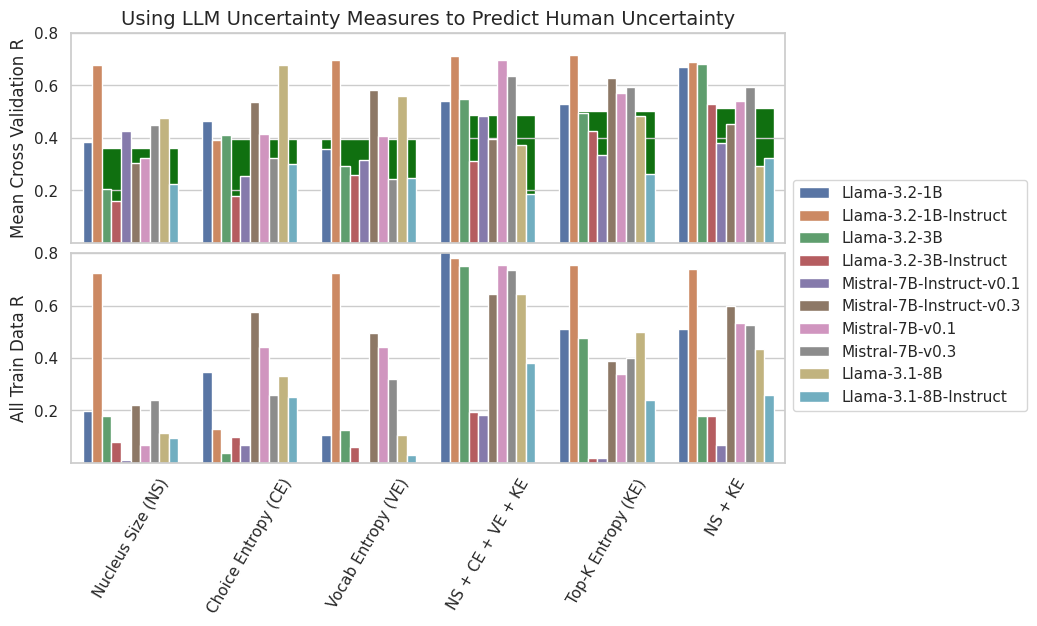

In [148]:


temp1 = pd.concat(individual_results)
temp1 = combine_measures_r2(temp1, df)
temp1.sort_values(['model'], inplace=True)
result = temp1.groupby(['model', 'measure'])['r2'].mean().reset_index()

temp2 = pd.concat(combined_results)
temp2 = combine_measures_r2(temp2, df)
temp2.sort_values(['model'], inplace=True)
temp2 = temp2.groupby('model')['r2'].mean().reset_index()
temp2['measure'] = 'All Combined'

temp3 = pd.concat(combined2_results)
temp3 = combine_measures_r2(temp3, df)
temp3.sort_values(['model'], inplace=True)
temp3 = temp3.groupby('model')['r2'].mean().reset_index()
temp3['measure'] = 'NS and CE combined'

result = pd.concat([result, temp2, temp3], axis=0)

result['r'] = result['r2'].apply(lambda x: np.sqrt(x))
# result['r'] = result['r2'].apply(lambda x: x)
result = result.merge(df.groupby('model').first().reset_index()[['params', 'model']], on='model', how='inner')


means = result.groupby(['measure'])['r'].mean().reset_index()[['r', 'measure']]
means = means.rename(columns={'r':'mean'})
result = result.merge(means, on='measure', how='inner')
result = result.sort_values(['mean', 'params'], ascending=True)

sortby = result[['model', 'measure']]
sortby['sort'] = range(1, len(sortby) + 1)


# remove substring from model
result['model'] = result['model'].apply(lambda x: map_model(x))

means['measure'] = means['measure'].apply(lambda x: map_measure(x))
result['measure'] = result['measure'].apply(lambda x: map_measure(x))

# create a over under subplot
fig, axs = plt.subplots(2, 1, figsize=(8,5))
# make plots share axes
fig.tight_layout()

sns.barplot(x='measure', y='r', hue='model', data=result, ax = axs[0])

# adjust labels for ax
axs[0].set_xticklabels('')
# turn off x labels
axs[0].set_xlabel('')
axs[0].set_ylabel('Mean Cross Validation R')
axs[0].set_title('Using LLM Uncertainty Measures to Predict Human Uncertainty', fontsize=14)


# plot the mean of each of the measures behind the bars
sns.barplot(x='measure', y='mean', data=means, color='green', zorder=0, ax=axs[0])

# move legend out of plot
axs[0].legend(bbox_to_anchor=(1.01, 0.3), loc=2, borderaxespad=0.)


new = result_full_train.merge(sortby, on=['model', 'measure'], how='inner').sort_values(['sort'], ascending=True)
new['measure'] = new['measure'].apply(lambda x: map_measure(x))
# new = result_full_train
new['r'] = new['r2'].apply(lambda x: np.sqrt(x))
sns.barplot(x='measure', y='r', hue='model', data=new, ax=axs[1])

axs[1].set_ylabel('All Train Data R')
plt.xticks(rotation=60)
axs[1].get_legend().remove()

axs[0].set(xlabel=None)
axs[1].set(xlabel=None)

# set y limits
axs[0].set_ylim(0,0.8)
axs[1].set_ylim(0,0.8)

# remove the first y tick
axs[0].set_yticks(axs[0].get_yticks()[1:])
axs[1].set_yticks(axs[1].get_yticks()[1:])




fig.subplots_adjust(hspace=0.05)
plt.show()

